In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from utils import *


In [8]:
dataset = load_conll_ner_data()
NER_TYPES = {
    'B-MISC': [],
    'B-PER': [],
    'B-ORG': [],
    'B-LOC': [],
    'I-LOC': [],
    'I-PER': [],
    'I-MISC': [],
    'I-ORG': [],
    'O': [],
}

In [10]:
dataset.shape

(6962, 10)

## Creating a small sample of annotated data

In [3]:

SAMPLE_DATA = .30
small_df = dataset.iloc[:int(len(dataset)*SAMPLE_DATA)]


for ner in NER_TYPES.keys():
    temp_data = []
    for value in small_df[ner]:
        if isinstance(value, list):
            for smaller_value in value:
                temp_data.append(smaller_value)
    # Will make the dict for that NER data now
    docs = [clean_text_kaggle(text) for text in temp_data]
    # string_list = [" ".join(clean_text(text)) for text in temp_data]
    cv=CountVectorizer()
    word_count_vector=cv.fit_transform(docs)
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(word_count_vector)
    df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
    NER_TYPES[ner].extend(df_idf.sort_values(by=["idf_weights"],ascending=False)[df_idf.idf_weights > 0].index.values.tolist())


/home/needshelp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


## Testing with UNION

In [5]:
#  Testing with the above sample
history = []
test = dataset.iloc[int(len(dataset)*SAMPLE_DATA):]
total_help = 0
total_matches = []
for candidate in test.values:
    local_help = 0
    matches = []
    tokens = candidate[0].split()
    for ner in NER_TYPES.keys():
        intersection = set(tokens).intersection(NER_TYPES[ner])
        if intersection:
            local_help += len(intersection)
            matches.append([ner, intersection])
    if local_help:
        total_help+=local_help
        total_matches+=matches

print(total_help)

47311


## Testing with many different sample size

In [17]:
for SAMPLE_SIZE in [.01, .04, .08, .1, .2, .3, .4, .5][:]:
    small_df = dataset.iloc[:int(len(dataset)*SAMPLE_SIZE)]
    print(small_df.shape)
    for ner in NER_TYPES.keys():
        temp_data = []
        for value in small_df[ner]:
            if isinstance(value, list):
                for smaller_value in value:
                    temp_data.append(smaller_value)
        # Will make the dict for that NER data now
        docs = [clean_text_kaggle(text) for text in temp_data]
        # string_list = [" ".join(clean_text(text)) for text in temp_data]
        cv=CountVectorizer()
        word_count_vector=cv.fit_transform(docs)
        tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
        tfidf_transformer.fit(word_count_vector)
        df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
        NER_TYPES[ner].extend(df_idf.sort_values(by=["idf_weights"],ascending=False)[df_idf.idf_weights > 0].index.values.tolist())

    #  Testing with the above sample
    history = []
    test = dataset.iloc[int(len(dataset)*SAMPLE_SIZE):]
    print(test.shape)
    total_help = 0
    total_matches = []
    candidate_help = 0
    for candidate in test.values:
        local_help = 0
        matches = []
        tokens = candidate[0].split()
        for ner in NER_TYPES.keys():
            intersection = set(tokens).intersection(NER_TYPES[ner])
            if intersection:
                local_help += len(intersection)
                matches.append([ner, intersection])
        if local_help:
            candidate_help +=1
            total_help+=local_help
            total_matches+=matches
    print(SAMPLE_SIZE, total_help, candidate_help)
    print("---------------------------")
    print(test.shape[0], candidate_help, candidate_help/test.shape[0])
    print("---------------------------------------------------------------------------------")    

(69, 10)
(6893, 10)


/home/needshelp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.01 76830 6527
---------------------------
6893 6527 0.9469026548672567
---------------------------------------------------------------------------------
(278, 10)
(6684, 10)
0.04 74726 6328
---------------------------
6684 6328 0.9467384799521245
---------------------------------------------------------------------------------
(556, 10)
(6406, 10)
0.08 71766 6068
---------------------------
6406 6068 0.947236965344989
---------------------------------------------------------------------------------
(696, 10)
(6266, 10)
0.1 70205 5929
---------------------------
6266 5929 0.9462176827322055
---------------------------------------------------------------------------------
(1392, 10)
(5570, 10)
0.2 62180 5271
---------------------------
5570 5271 0.9463195691202873
---------------------------------------------------------------------------------
(2088, 10)
(4874, 10)
0.3 54225 4629
---------------------------
4874 4629 0.9497332786212557
-------------------------------------------------

## Plotting the values

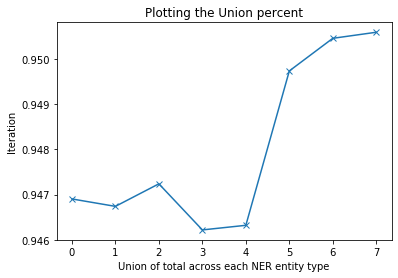

In [33]:
plt.title("Plotting the Union percent")
plt.xlabel("Union of total across each NER entity type")
plt.ylabel("Iteration")
plt.plot(
    [
    0.9469026548672567,
    0.9467384799521245,
    0.947236965344989,
    0.9462176827322055,
    0.9463195691202873,
    0.9497332786212557,
    0.9504547630445189,
    0.9505889112324045        
    ], marker="x"
)

In [28]:
[i*0.01 for i in range(8,11)]

[0.08, 0.09, 0.1]

In [12]:
test

,sentence,O,B-PER,B-ORG,B-MISC,B-LOC,I-LOC,I-PER,I-MISC,I-ORG
1392,He said a male teenager sleeping upstairs rep...,"[He, said, a, male, teenager, sleeping, upstai...",[White],[],[],[],[],[],[],[]
1393,The other teenagers also confronted the assai...,"[The, other, teenagers, also, confronted, the,...",[],[],[],[],[],[],[],[]
1394,""" At least two of them were sexually molested...","["", At, least, two, of, them, were, sexually, ...",[Black],[],[],[],[],[],[],[]
1395,He said all of the wounded teenagers were tak...,"[He, said, all, of, the, wounded, teenagers, w...",[],[],[],[],[],[],[],[]
1396,Police said the girl who died was identified ...,"[Police, said, the, girl, who, died, was, iden...",[Michelle],[],[],[],[],[Harper],[],[]
...,...,...,...,...,...,...,...,...,...,...
6957,"That , and the fact he is only a few hours dr...","[That, ,, and, the, fact, he, is, only, a, few...",[],[Aberdeen],[GRAND],[SAN],[MARINO],[],[PRIX],[]
6958,"IMOLA , Italy 1996-08-30 Practice times set o...","[,, 1996-08-30, Practice, times, set, on, Frid...","[Michael, Jean-Michel, Norifumi, Luca, Alex, S...","[Honda, Yamaha, Yamaha, Honda, Honda, Suzuki, ...","[Grand, BRITISH]","[IMOLA, Italy, San, Australia, France, Japan, ...","[Marino, States]","[Doohan, Bayle, Abe, Cadalora, Criville, Russe...","[Prix, MASTERS]",[]
6959,"NORTHAMPTON , England 1996-08-30 Leading scor...","[,, 1996-08-30, Leading, scores, after, the, t...","[Robert, Pedro, Miguel, Costantino, Antoine, I...",[],[British],"[NORTHAMPTON, England, Australia, Spain, Spain...",[],"[Allenby, Linhart, Angel, Martin, Rocca, Lebou...",[Masters],[]
6960,-DOCSTART- SOCCER - ENGLISH SOCCER RESULTS,"[-DOCSTART-, SOCCER, -, SOCCER, RESULTS]",[],[],[ENGLISH],[],[],[],[],[]
